# **1. Understanding the Problem and Objective:**
Before diving into the data, we need understand the problem we are trying to solve and the goals of our analysis. This helps in directing our exploration and identifying relevant patterns.For this Health Insurance data,this dataset is about an Insurance company that has provided Health Insurance to its customers. Now we need build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

# **2. Importing libraries and Loading the Dataset:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [2]:
df_test = pd.read_csv('./test.csv')
df = pd.read_csv('./train.csv')

# **3. Checking the Structure of the Dataset:**

In [3]:
# prompt: check head of df

df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
df.shape

(11504798, 12)

# **4. Checking the Duplicate and Missing Values in the Dataset:**

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(11504798, 12)

In [8]:
missing_values = df.isnull().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

As We Can See There Are No Duplicate Values And Missing Values


# **5. Exploratory Data Analysis(EDA)**

In [9]:
sns.set(style="whitegrid")

In [10]:
# sns.pairplot(df)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


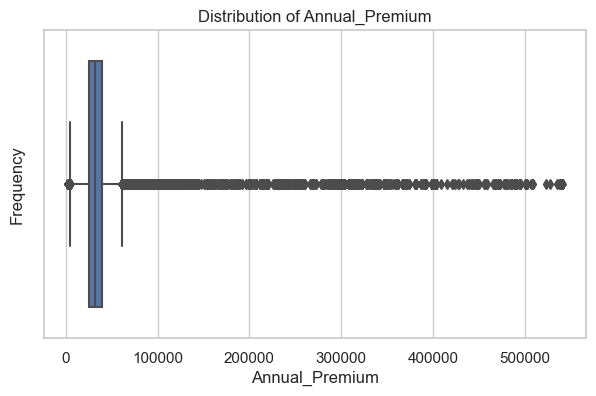

In [11]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


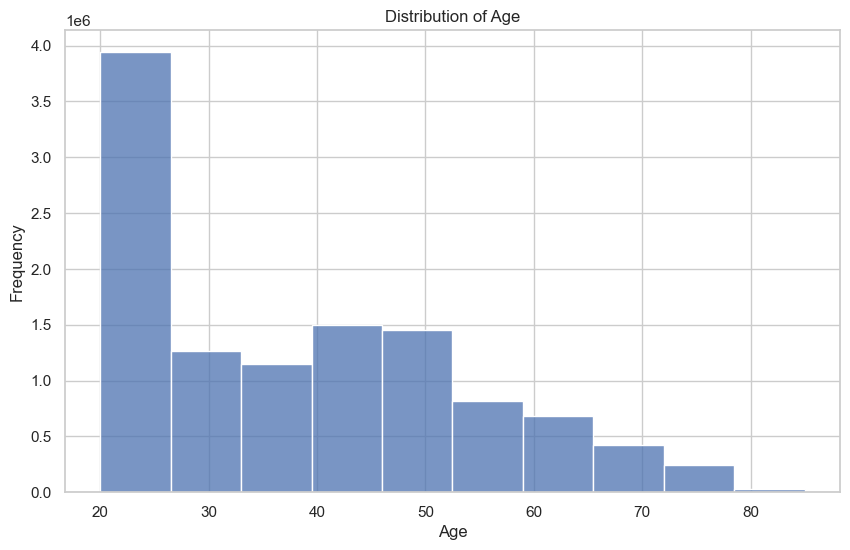

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


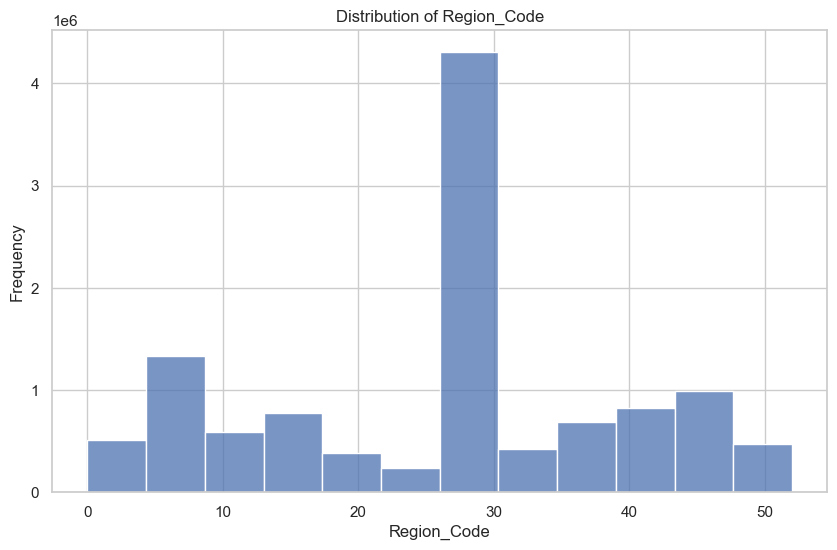

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Region_Code'], kde=False, bins=12)
plt.title('Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Frequency')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


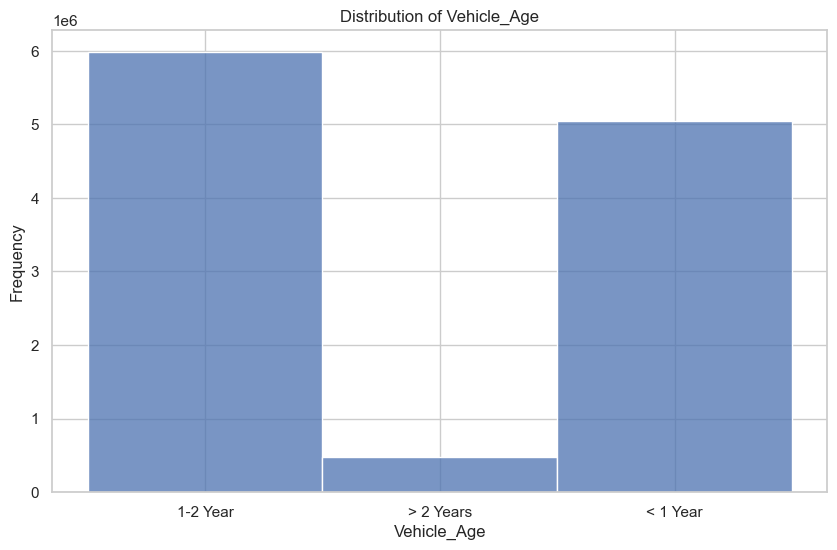

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

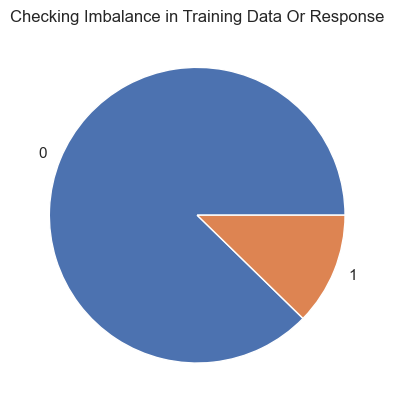

In [15]:
#Checking If training data is Imbalanced
response_data = df['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')


# **6. Feature Engineering**

In [16]:
df.info()
print('\n')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB




,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [17]:
def veh_a(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

In [18]:
df['Vehicle_Damages'] = df['Vehicle_Damage'].apply(veh_a)
df.drop(['Vehicle_Damage'],axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damages
0,0,Male,21,1,35.0,0,1-2 Year,65101.0,124.0,187,0,1
1,1,Male,43,1,28.0,0,> 2 Years,58911.0,26.0,288,1,1
2,2,Female,25,1,14.0,1,< 1 Year,38043.0,152.0,254,0,0
3,3,Female,35,1,1.0,0,1-2 Year,2630.0,156.0,76,0,1
4,4,Female,36,1,15.0,1,1-2 Year,31951.0,152.0,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,27412.0,26.0,218,0,1
11504794,11504794,Female,26,1,36.0,0,< 1 Year,29509.0,152.0,115,1,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,2630.0,152.0,189,0,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,48443.0,26.0,274,1,1


In [19]:
df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
df = pd.get_dummies(df, columns=['Vehicle_Age'])
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damages,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,Male,21,1,35.0,0,Yes,65101.0,124.0,187,0,1,True,False,False
1,1,Male,43,1,28.0,0,Yes,58911.0,26.0,288,1,1,False,False,True
2,2,Female,25,1,14.0,1,No,38043.0,152.0,254,0,0,False,True,False
3,3,Female,35,1,1.0,0,Yes,2630.0,156.0,76,0,1,True,False,False
4,4,Female,36,1,15.0,1,No,31951.0,152.0,294,0,0,True,False,False


In [20]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [21]:
def veh_a(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

In [22]:
df_test['Vehicle_Damages'] = df_test['Vehicle_Damage'].apply(veh_a)
df_test.drop(['Vehicle_Damage'],axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damages
0,11504798,Female,20,1,47.0,0,< 1 Year,2630.0,160.0,228,0
1,11504799,Male,47,1,28.0,0,1-2 Year,37483.0,124.0,123,1
2,11504800,Male,47,1,43.0,0,1-2 Year,2630.0,26.0,271,1
3,11504801,Female,22,1,47.0,1,< 1 Year,24502.0,152.0,115,0
4,11504802,Male,51,1,19.0,0,1-2 Year,34115.0,124.0,148,0
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,51661.0,124.0,109,1
7669862,19174660,Male,28,1,50.0,1,< 1 Year,25651.0,152.0,184,0
7669863,19174661,Male,47,1,33.0,1,1-2 Year,2630.0,138.0,63,0
7669864,19174662,Male,30,1,28.0,0,< 1 Year,38866.0,124.0,119,1


In [23]:
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].astype('category')
df_test = pd.get_dummies(df_test, columns=['Vehicle_Age'])
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damages,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,11504798,Female,20,1,47.0,0,No,2630.0,160.0,228,0,False,True,False
1,11504799,Male,47,1,28.0,0,Yes,37483.0,124.0,123,1,True,False,False
2,11504800,Male,47,1,43.0,0,Yes,2630.0,26.0,271,1,True,False,False
3,11504801,Female,22,1,47.0,1,No,24502.0,152.0,115,0,False,True,False
4,11504802,Male,51,1,19.0,0,No,34115.0,124.0,148,0,True,False,False


In [24]:
df_test['Gender'] = df_test['Gender'].astype('category')
df_test = pd.get_dummies(df_test, columns=['Gender'],drop_first=True)

df['Gender'] = df['Gender'].astype('category')
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)

In [25]:
df = df.drop(['Vehicle_Damage'],axis=1)
df_test = df_test.drop(['Vehicle_Damage'],axis=1)

# **7. SPLITTING DATA**

In [26]:
X_train = df[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damages', 'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Gender_Male']]
y_train = df['Response']

X_test = df_test[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damages', 'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Gender_Male']]

In [27]:
y_train.head()

0    0
1    1
2    0
3    0
4    0
Name: Response, dtype: int64

In [28]:
df_test.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damages,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender_Male
0,11504798,20,1,47.0,0,2630.0,160.0,228,0,False,True,False,False
1,11504799,47,1,28.0,0,37483.0,124.0,123,1,True,False,False,True
2,11504800,47,1,43.0,0,2630.0,26.0,271,1,True,False,False,True
3,11504801,22,1,47.0,1,24502.0,152.0,115,0,False,True,False,False
4,11504802,51,1,19.0,0,34115.0,124.0,148,0,True,False,False,True


# **8. Using Smote To Handle Imblanced Data**

In [29]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

Response
0    10089739
1     1415059
Name: count, dtype: int64

Response
0    10089739
1    10089739
Name: count, dtype: int64


# **9. Scaling Data**

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train_smote)
data_scaled = scaler.fit_transform(df)

# **10. Applying ML model**

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)

In [33]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(14125634, 12) (14125634,) (6053844, 12) (6053844,)


In [34]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [35]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 81.15033987147055
Accuracy_Score of LogisticRegression() model on Testing Data is: 81.14226266814936
Precision Score of LogisticRegression() model is: 0.757463866977808
Recall Score of LogisticRegression() model is: 0.9161364633611233
AUC Score of LogisticRegression() model is: 0.8935140068429683

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


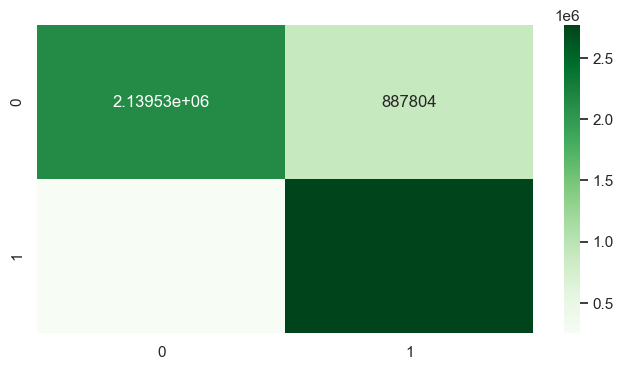

In [36]:
model_prediction(LogisticRegression())

# **-----------------End Of Project----------------------**